# Introduction

    The present study involves the development of a deep learning architecture to perform image classification. The dataset comprises images that are labeled as either 0 or 1. Specifically, images labeled as 0 denote the absence of metastasis, while those labeled as 1 indicate the presence of cancer cells in a metastatic state.
    

# Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import glob
import os
import cv2
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from PIL import Image
from pathlib import Path

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, PReLU, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import Constant

C:\Users\Pichau\anaconda3\Lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


    Check if there is a GPU

In [2]:
gpus = tf.config.experimental.list_physical_devices(device_type="GPU")
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

   
    To conduct an analysis of the distribution of images in a cancer cell dataset, it is essential to import the data and examine how the images are distributed by their respective labels. The dataset under consideration comprises images of cancer cells, where some cells are in the metastasis process.

In [3]:
df_label = pd.read_csv('train_labels.csv')

In [4]:
df_label['label'].value_counts()

0    130908
1     89117
Name: label, dtype: int64

    The class 'PrepareData' serves the purpose of filtering out unsatisfactory images from a dataset, and subsequently exporting them to a designated folder based on their respective labels.
    
    - 0 for no metastasis cells
    - 1 for metastasis cells
    

In [5]:
class PrepareData:
    def __init__(self ):
        """
        Initializes the prepare_data class with the data preparation steps.
        """
        self.df_label = pd.read_csv('train_labels.csv')
        self.df_label = self.df_label[self.df_label['id'] != '9369c7278ec8bcc6c880d99194de09fc2bd4efbe']
        self.df_label = self.df_label[self.df_label['id'] != '3147e34a392cc94d7071dc31fb56c76c8c7a4d87']
        df_0 = self.df_label[self.df_label['label'] == 0].sample(self.df_label['label'].value_counts()[1]
                                                                 , random_state = 101)     #get n number of observation
        df_1 = self.df_label[self.df_label['label'] == 1].sample(self.df_label['label'].value_counts()[1]
                                                                 , random_state = 101)     #get n number of observation
        self.df_label = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)                 #concat them together
        self.df_label = shuffle(self.df_label)             #shuffle the data
        self.df_train, self.df_val = train_test_split(self.df_label, test_size=0.15, random_state=101)
        
    def create_folders(self, train_dir):
        """
        Creates folders for storing training or validation data.
        
        Parameters:
        train_dir (str): the directory where the folders should be created.
        """   
        no_metastasis = os.path.join(train_dir, '0')
        has_metastasis = os.path.join(train_dir, '1')

        try:
            os.mkdir(train_dir)
        except OSError as error:
            print(error)
            print("folder could not be created")  
            
        try:
            os.mkdir(no_metastasis)
        except OSError as error:
            print(error)
            print("folder could not be created") 
            
        try:
            os.mkdir(has_metastasis)
        except OSError as error:
            print(error)
            print("folder could not be created")
    
    def export_data_to_folders(self, train_dir):
        """
        Exports the training or validation data to the respective folders.
        
        Parameters:
        train_dir (str): the directory where the folders are located.
        """
        if train_dir == 'train_dir':
            self.df_label = self.df_train
        elif train_dir == 'val_dir':
            self.df_label = self.df_val
            
        for image in self.df_label['id']:
            #target = self.df_label.loc[image, 'label']
            target = int(self.df_label[self.df_label['id'] == image]['label'])
            departure =  os.path.join('train',
                                      image+'.tif')
            destination = os.path.join(train_dir,
                                       str(target), 
                                       image+'.png')
            cv2_image = cv2.imread(departure)
            cv2.imwrite(destination, cv2_image)
            #print(departure)
            #print(destination)
            
    def test_data(self):
        """
        Converts the test data from TIFF format to PNG format.
        """
        images_path = glob.glob('test/*.tif')
        file = [os.path.basename(x.replace('.tif', '')) 
                for x in glob.glob(r'test/*.tif')]
        try:
            os.mkdir('test_png')
        except OSError as error:
            print(error)
            print("folder could not be created") 
        
        for image in file:
            #target = self.df_label.loc[image, 'label']
            departure =  os.path.join('test', image+'.tif')
            destination = os.path.join('test_png', image+'.png')
            cv2_image = cv2.imread(departure)
            cv2.imwrite(destination, cv2_image)
            #print(departure)
            #print(destination)
        

    'file' is a list of all files without '.tif' end inside the data folder

In [6]:
file = [os.path.basename(x.replace('.tif', '')) 
        for x in glob.glob(r'test/*.tif')]

data = PrepareData()

data.create_folders('train_dir')
data.create_folders('val_dir')

data.export_data_to_folders('train_dir')
data.export_data_to_folders('val_dir')
data.test_data()

[WinError 183] Não é possível criar um arquivo já existente: 'train_dir'
folder could not be created
[WinError 183] Não é possível criar um arquivo já existente: 'train_dir\\0'
folder could not be created
[WinError 183] Não é possível criar um arquivo já existente: 'train_dir\\1'
folder could not be created
[WinError 183] Não é possível criar um arquivo já existente: 'val_dir'
folder could not be created
[WinError 183] Não é possível criar um arquivo já existente: 'val_dir\\0'
folder could not be created
[WinError 183] Não é possível criar um arquivo já existente: 'val_dir\\1'
folder could not be created
[WinError 183] Não é possível criar um arquivo já existente: 'test_png'
folder could not be created


# Loading and Preprocessing Data

    These functions create data generators for loading and preprocessing images from the specified directories.

    'ImageDataGenerator' is a class from the Keras library that provides various image augmentation and preprocessing options. Here, it is used to rescale the pixel values of the images to the range [0,1].

    'datagen.flow_from_directory' is a method of the 'ImageDataGenerator' class that generates batches of data from images in a specified directory. It takes several arguments to customize the loading and preprocessing of the images.

    In this case, 'train_gen' and 'val_gen' are two generators created to load training and validation data respectively from the directories train_dir and val_dir. Both generators are set up to resize the images to 96x96 pixels, convert them to RGB color mode, and convert the labels to binary format. The batch size is set to 50, meaning that the generator will load 50 images at a time.

In [7]:
datagen = ImageDataGenerator(rescale=1/255)

train_gen = datagen.flow_from_directory('train_dir',
                                        target_size=(96,96),
                                        batch_size=50,
                                        class_mode='binary',
                                        color_mode = 'rgb')

val_gen = datagen.flow_from_directory('val_dir',
                                        target_size=(96,96),
                                        batch_size=50,
                                        class_mode='binary',
                                        color_mode = 'rgb')



Found 178234 images belonging to 2 classes.
Found 136866 images belonging to 2 classes.


# Building Models

    In the process of constructing models to optimize test accuracy, it is common practice to utilize validation accuracy as a key indicator of model fit. While the ultimate aim may be to achieve the highest possible accuracy score on the test data, the validation accuracy provides a valuable metric for evaluating the performance of the model during the training process. Hence, the validation accuracy serves as an important tool for identifying and fine-tuning models that demonstrate good fit and generalizability to new data.
    
### Main Diference of the Models

    The three models have different architectures, which can affect their performance on different tasks:

    The first model is a basic convolutional neural network with four blocks of convolutional layers followed by max pooling and batch normalization, and three dense layers with dropout regularization. It has a total of about 1.3 million trainable parameters.

    The second model is a deeper version of the basic CNN, with six blocks of convolutional layers and three dense layers with dropout regularization. It has a total of about 3.3 million trainable parameters.

    The third model has a similar number of layers to the second model, but uses PReLU activation functions instead of ReLU, and adds batch normalization after each convolutional layer. It also has slightly fewer trainable parameters than the second model, at about 2.8 million.

    The differences in architecture can impact the models' ability to learn and generalize to new data, as well as their computational efficiency and training time. Generally, deeper and more complex models may have a higher capacity to learn complex patterns, but can also be prone to overfitting and require more data and computational resources to train effectively.
    
    
  - #### Model 1
   
           This is a basic convolutional neural network architecture for binary image classification. It includes two convolutional layers, each with 32 filters, followed by ReLU activation functions, max pooling, and batch normalization. The output of the convolutional layers is fed to three fully connected layers with ReLU activation and dropout. The output layer is a dense layer with sigmoid activation for binary classification. The model uses Adam optimizer with binary cross-entropy loss and accuracy metric.
   
   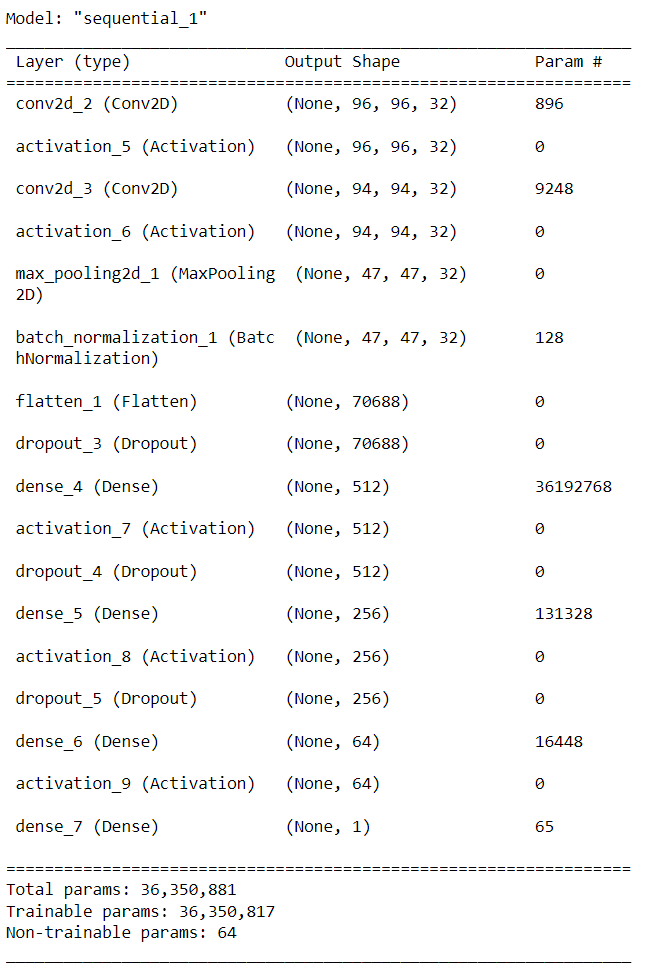

In [8]:
def get_basic_model():
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=(96,96,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.25))
    model.add(Dense(512))
    model.add(Activation('relu'))

    model.add(Dropout(0.25))
    model.add(Dense(256))
    model.add(Activation('relu'))

    model.add(Dropout(0.25))
    model.add(Dense(64))
    model.add(Activation('relu')) 

    model.add(Dense(1, activation='sigmoid'))
    
    opt = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model


In [ ]:
model1 = get_basic_model()
model1_hist = model1.fit_generator(train_gen,
                        epochs = 10,
                        validation_data = val_gen)

<ipython-input-9-6f2f657a3aef>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model1_hist = model1.fit_generator(train_gen,


Epoch 1/10
3565/3565 [==============================] - 1157s 323ms/step - loss: 0.4406 - accuracy: 0.8042 - val_loss: 0.9978 - val_accuracy: 0.6025
Epoch 2/10
1210/3565 [=========>....................] - ETA: 1:42 - loss: 0.3780 - accuracy: 0.8360

In [ ]:
plt.plot(model1_hist.history['accuracy'], label="train accuracy" )
plt.plot(model1_hist.history['val_accuracy'], label="validation accuracy")
plt.legend(loc='center right')
plt.show()


   - #### Model 2

            The architecture is a convolutional neural network for image classification. It consists of several layers of convolution and pooling, with increasing depth of feature extraction. The network has four blocks of convolutional layers with 32, 64, 128, and 256 filters respectively. Each block is followed by a max pooling layer and batch normalization. The final block is flattened and passed through three dense layers with dropout regularization. The model is optimized using the Adam optimizer with a binary cross-entropy loss function and accuracy metrics
            In addition to the explanation provided, it is worth noting that the Adam optimizer used in this architecture has two important hyperparameters: beta 1 and beta 2. Beta 1 is the exponential decay rate for the first moment estimates (mean) of the gradients, while beta 2 is the exponential decay rate for the second moment estimates (variance) of the gradients. These parameters control the rate of decay for the estimates of the mean and variance of the gradients used in the optimizer.
        
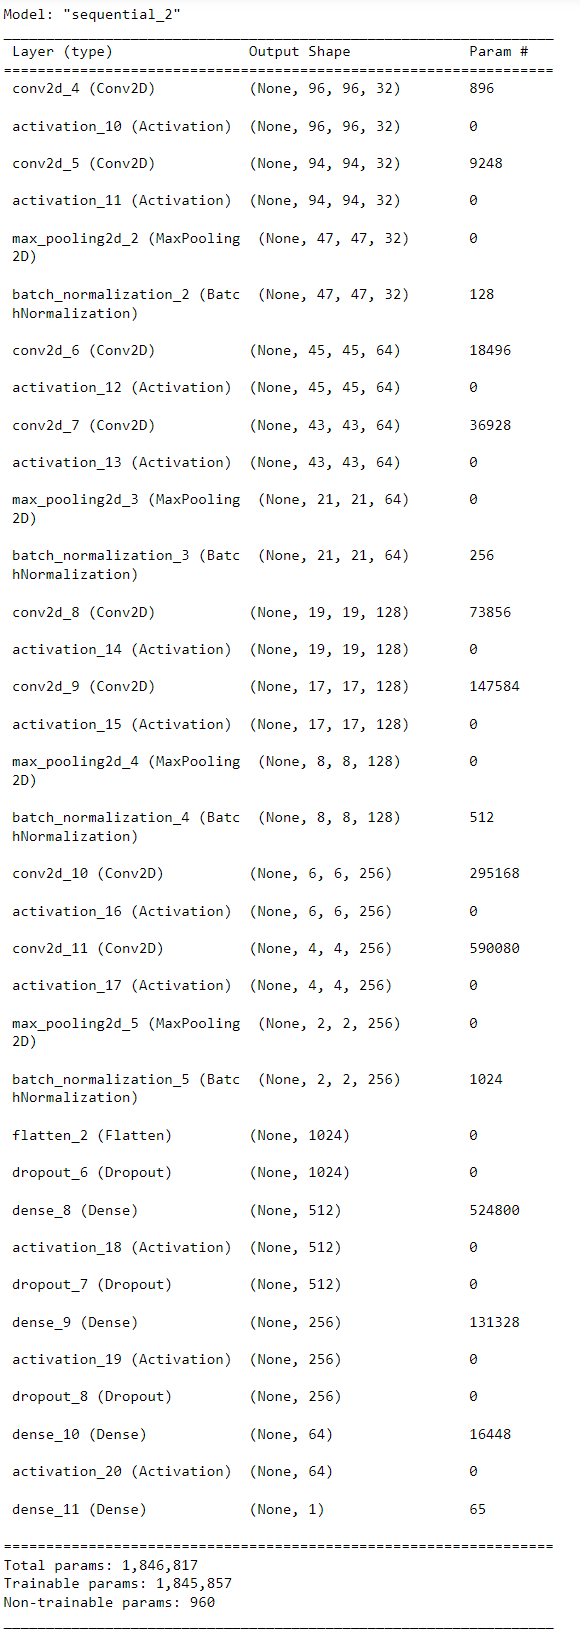


In [ ]:
def get_basic_model2():
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=(96,96,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    model.add(Dropout(0.25))
    model.add(Dense(512))
    model.add(Activation('relu'))

    model.add(Dropout(0.25))
    model.add(Dense(256))
    model.add(Activation('relu'))

    model.add(Dropout(0.25))
    model.add(Dense(64))
    model.add(Activation('relu')) 

    model.add(Dense(1, activation='sigmoid'))
    
    opt = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [ ]:
model2 = get_basic_model2()

In [ ]:
model2_history = model2.fit(train_gen,
                        epochs = 30, batch_size=128,
                        validation_data = val_gen)



In [ ]:
plt.plot(model2_history.history['accuracy'], label="train accuracy" )
plt.plot(model2_history.history['val_accuracy'], label="validation accuracy")
plt.legend(loc='lower right')
plt.show()

   - #### Model 3

            This is a convolutional neural network for binary image classification. The architecture consists of several convolutional layers with increasing depth of feature extraction. The network has three blocks of convolutional layers with 32, 64, and 128 filters respectively. Each block is followed by max pooling and batch normalization. The final block is flattened and passed through three dense layers with dropout regularization. The model is optimized using RMSprop with binary cross-entropy loss and accuracy metrics.
     **NOTE**:   
                The activation function used in this model is PRelu, not Relu. PRelu is similar to Relu but there is an new term in the equation. One that gives a slope to the negative part of Relu. This makes the negative slope a parameter that can be adjusted by the optimizer, allowing the model to learn more complex functions. PReLU can help avoid the dying ReLU problem, leading to better performance in some cases.
            ReLU has the advantage of being computationally efficient and allowing the model to learn non-linear features. However, ReLU can lead to the problem of "dying ReLU", where a neuron becomes permanently inactive during training.
            
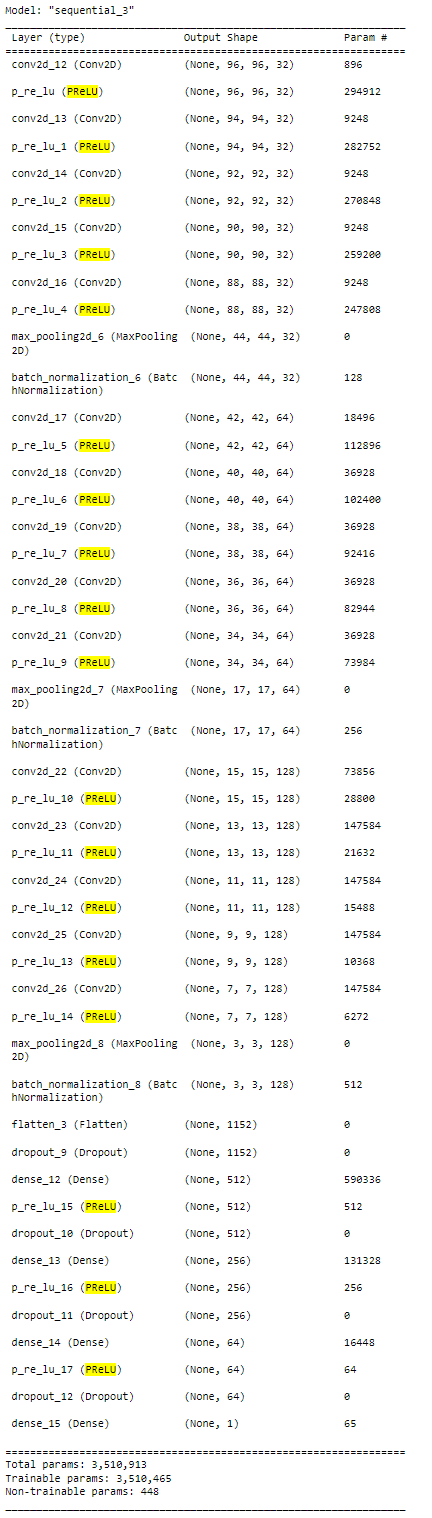 

In [ ]:
def get_basic_model3():
    
    model3 = Sequential()
    model3.add(Conv2D(32, (3, 3), padding='same',input_shape=(96,96,3)))
    model3.add(PReLU(alpha_initializer=Constant(value=0.25)))
    model3.add(Conv2D(32, (3, 3)))
    model3.add(PReLU(alpha_initializer=Constant(value=0.25)))
    model3.add(Conv2D(32, (3, 3)))
    model3.add(PReLU(alpha_initializer=Constant(value=0.25)))
    model3.add(Conv2D(32, (3, 3)))
    model3.add(PReLU(alpha_initializer=Constant(value=0.25)))
    model3.add(Conv2D(32, (3, 3)))
    model3.add(PReLU(alpha_initializer=Constant(value=0.25)))
    model3.add(MaxPooling2D(pool_size=(2, 2)))
    model3.add(BatchNormalization())

    model3.add(Conv2D(64, (3, 3)))
    model3.add(PReLU(alpha_initializer=Constant(value=0.25)))
    model3.add(Conv2D(64, (3, 3)))
    model3.add(PReLU(alpha_initializer=Constant(value=0.25)))
    model3.add(Conv2D(64, (3, 3)))
    model3.add(PReLU(alpha_initializer=Constant(value=0.25)))
    model3.add(Conv2D(64, (3, 3)))
    model3.add(PReLU(alpha_initializer=Constant(value=0.25)))
    model3.add(Conv2D(64, (3, 3)))
    model3.add(PReLU(alpha_initializer=Constant(value=0.25)))
    model3.add(MaxPooling2D(pool_size=(2, 2)))
    model3.add(BatchNormalization())

    model3.add(Conv2D(128, (3, 3)))
    model3.add(PReLU(alpha_initializer=Constant(value=0.25)))
    model3.add(Conv2D(128, (3, 3)))
    model3.add(PReLU(alpha_initializer=Constant(value=0.25)))
    model3.add(Conv2D(128, (3, 3)))
    model3.add(PReLU(alpha_initializer=Constant(value=0.25)))
    model3.add(Conv2D(128, (3, 3)))
    model3.add(PReLU(alpha_initializer=Constant(value=0.25)))
    model3.add(Conv2D(128, (3, 3)))
    model3.add(PReLU(alpha_initializer=Constant(value=0.25)))
    model3.add(MaxPooling2D(pool_size=(2, 2)))
    model3.add(BatchNormalization())

    model3.add(Flatten())
    model3.add(Dropout(0.25))
    model3.add(Dense(512))
    model3.add(PReLU(alpha_initializer=Constant(value=0.25)))

    model3.add(Dropout(0.25))
    model3.add(Dense(256))
    model3.add(PReLU(alpha_initializer=Constant(value=0.25)))

    model3.add(Dropout(0.25))
    model3.add(Dense(64))
    model3.add(PReLU(alpha_initializer=Constant(value=0.25)))

    model3.add(Dropout(0.25))
    model3.add(Dense(1, activation='sigmoid'))
    opt = tf.keras.optimizers.RMSprop(0.001)
    model3.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model3

In [ ]:
model3 = get_basic_model3()


In [ ]:
model3_history = model3.fit_generator(train_gen,
                        epochs = 30,
                        validation_data = val_gen)


In [ ]:
model3_history.history['val_accuracy']

plt.plot(model3_history.history['accuracy'], label="train accuracy" )
plt.plot(model3_history.history['val_accuracy'], label="validation accuracy")
plt.legend(loc='lower right')
plt.show()

# Predict Test Data

    Test data is the one to be predicted in order to receive a score in the kaggle challenge.

In [ ]:
def pred_test(model):
    datagen_test = ImageDataGenerator(rescale=1/255)
    test_df = pd.DataFrame({'id':os.listdir('test')})
    test_gen = datagen_test.flow_from_dataframe(dataframe=test_df,
                                                directory='test',
                                                x_col='id', 
                                                y_col=None,
                                                target_size=(96,96),         # original image = (96, 96) 
                                                batch_size=1,
                                                shuffle=False,
                                                class_mode=None)

    pred = model.predict(test_gen, verbose=1)
    return pred

In [ ]:
pred = pred_test(model1)
test_df = pd.DataFrame({'id':os.listdir('test')})
predictions = np.transpose(pred)[0]
submission_df = pd.DataFrame()
submission_df['id'] = test_df['id'].apply(lambda x: x.split('.')[0])
submission_df['label'] = list(map(lambda x: 0 if x < 0.5 else 1, predictions))
submission_df.head()
path = Path('submission_df1.csv')
submission_df.to_csv(path , index=False)

In [ ]:
pred = pred_test(model2)
test_df = pd.DataFrame({'id':os.listdir('test')})
predictions = np.transpose(pred)[0]
submission_df = pd.DataFrame()
submission_df['id'] = test_df['id'].apply(lambda x: x.split('.')[0])
submission_df['label'] = list(map(lambda x: 0 if x < 0.5 else 1, predictions))
submission_df.head()
path = Path('submission_df2.csv')
submission_df.to_csv(path , index=False)

In [ ]:
pred = pred_test(model3)
test_df = pd.DataFrame({'id':os.listdir('test')})
predictions = np.transpose(pred)[0]
submission_df = pd.DataFrame()
submission_df['id'] = test_df['id'].apply(lambda x: x.split('.')[0])
submission_df['label'] = list(map(lambda x: 0 if x < 0.5 else 1, predictions))
submission_df.head()
path = Path('submission_df3.csv')
submission_df.to_csv(path , index=False)

# Results

    The experimentation with three distinct neural network architectures has revealed that model 3, as anticipated, is the most effective architecture. However, given the size of the image dataset, it is possible that increasing the size of the network could yield even more favorable outcomes. 
    
    - model 1 = submission 1
    - model 2 = submission 2
    - model 3 = submission 3

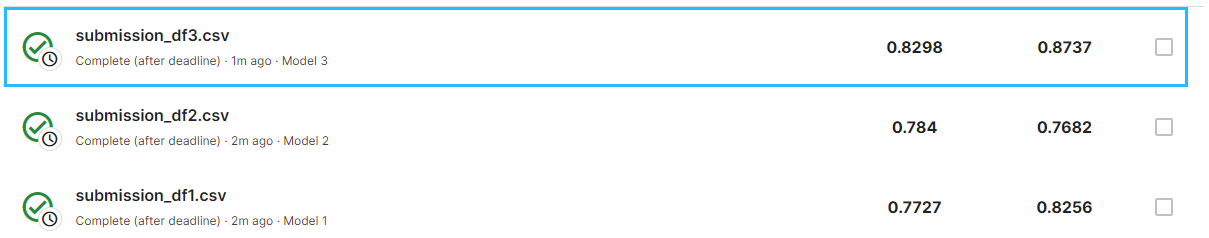